## Code To Perform Polynomial Regression to Predict Salary VS. Number of Years Of Experience

- Let's assume that you work as a consultatant to a start-up that has just started to hire employees.
- The HR Director reached out to you and asked you to perdict the salary of employees based on the number of years of experience.
- you Suggested to use a Polynomial regression model to try to create a model using the provided dataset.

### Step 1 : Import Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2 : Import Dataset

In [34]:
dataset = pd.read_csv('./Employee_Salary.csv')

In [35]:
dataset.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
Years of Experience    2000 non-null float64
Salary                 2000 non-null float64
dtypes: float64(2)
memory usage: 31.4 KB


### Step 3 : Visualize Dataset

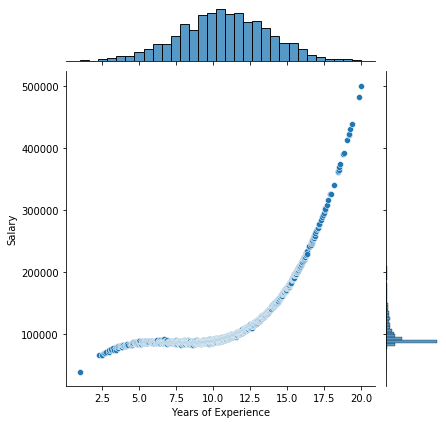

In [37]:
sns.jointplot(x='Years of Experience', y='Salary', data=dataset)

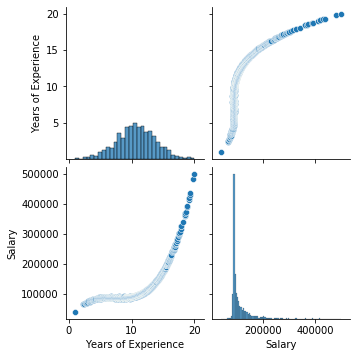

In [38]:
sns.pairplot(dataset)

### Step 4 : Create Training dataset

In [39]:
X = dataset[['Years of Experience']]
y = dataset[['Salary']]

In [40]:
# Note that we used the entire dataset for training only
X_train = X
y_train = y

### Step 5 : Train the Model

### Solution #1: Linear Assumption

In [41]:
y_train.shape

(2000, 1)

In [42]:
X_train.shape

(2000, 1)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
linearRegression = LinearRegression(fit_intercept=True)

In [45]:
linearRegression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
print('Linear Model Coefficient (m)', linearRegression.coef_)
print('Linear Model Coefficient (b)', linearRegression.intercept_)

Linear Model Coefficient (m) [[11640.22916165]]
Linear Model Coefficient (b) [-13063.09931519]


### Step 6 : Visualize the Result (Linear Regression)

Text(0.5, 1.0, 'Salary .VS Years of Experience (Training data)')

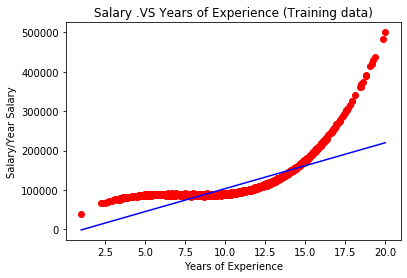

In [47]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, linearRegression.predict(X_train), color = 'blue')
plt.ylabel('Salary/Year Salary')
plt.xlabel('Years of Experience')
plt.title('Salary .VS Years of Experience (Training data)')

### Solution #2: Polynomial Assumption

In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
polynomialRegression = PolynomialFeatures(degree=5)

In [50]:
# Transform the matrix of features X into a multi array of features X_Columns
# which contains the original features and their associated polynomial terms
X_columns = polynomialRegression.fit_transform(X_train)

In [51]:
print(X_columns)

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.25794198e+00 5.09830199e+00 1.15116701e+01
  2.59926832e+01 5.86899707e+01]
 [1.00000000e+00 2.45087546e+00 6.00679053e+00 1.47218955e+01
  3.60815324e+01 8.84313424e+01]
 ...
 [1.00000000e+00 1.93533688e+01 3.74552884e+02 7.24886009e+03
  1.40289863e+05 2.71508145e+06]
 [1.00000000e+00 1.98425197e+01 3.93725587e+02 7.81250771e+03
  1.55019838e+05 3.07598419e+06]
 [1.00000000e+00 2.00000000e+01 4.00000000e+02 8.00000000e+03
  1.60000000e+05 3.20000000e+06]]


In [52]:
polyRegressor = LinearRegression()
polyRegressor.fit(X_columns, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
print('Linear Model Coefficient (m)', polyRegressor.coef_)
print('Linear Model Coefficient (b)', polyRegressor.intercept_)

Linear Model Coefficient (m) [[ 0.00000000e+00  3.27949771e+04 -4.65578675e+03  2.24001236e+02
  -1.03521070e+00  2.09284278e-02]]
Linear Model Coefficient (b) [11462.33808587]


In [54]:
### Step 6 : Visualize the Result (Polynomial Regression)

In [55]:
X_train.shape

(2000, 1)

In [56]:
y_predict = polyRegressor.predict(X_columns)

In [57]:
y_predict.shape

(2000, 1)

Text(0.5, 1.0, 'Salary .VS Years of Experience (Training data)')

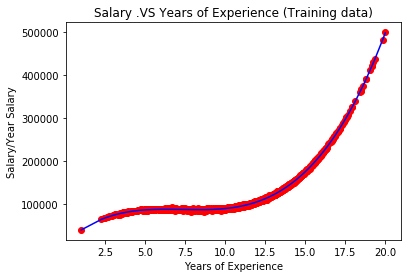

In [58]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_predict, color = 'blue')
plt.ylabel('Salary/Year Salary')
plt.xlabel('Years of Experience')
plt.title('Salary .VS Years of Experience (Training data)')